# Parsing the Elog into a run list

In [2]:
# Some standard import statements that are nice for Jupyter

import sys
import logging

import numpy as np
# import scipy as sp

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200

import json

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

## Overview of Configurations

Here I've made a preliminary outline of the configurations. There are some issues to be resolved.

*Friday, Dec. 8 begins*

**1 x 30 cm Plexiglass guide?**

Runs 4 - 14

**Guide 1? 2 x 30 Plexiglass guides?**

Runs 16 - 21

Everything up to this point can be disregarded. Normalization is now correct.

**Guide 1? 2 x 30 Plexiglass guides?**

Runs 22 - 35

**Guide 1? 2 x 30 Plexiglass guides? removed? <br/>
JP SUS guide with NiP installed**

Runs 48 - 66

**JP SUS guide with NiP removed. <br/> 
No Guide installed?**

Runs 76 - 88

**JP Ti guide with NiP installed**

Runs 98 - 105

*Saturday, Dec. 9 begins*

Runs 1 - 90

Runs 99 - 110

Runs 120 - 125

Runs 127 - 135

**SS disk installed**

Runs 145 - 159

**Two flanges installed**

Runs 175 - 189

**Two flanges removed <br/>
UGD01 installed**

Runs 198 - 199

*Sunday, Dec. 10 begins*

Runs 1 - 113

**UGD01 removed<br/>Two flanges installed** 

Runs 122 - 136

**Two flanges removed<br/>UGD03 installed**

Runs 145 - 161

**UGD03 removed<br/>Two flanges installed**

Run 170

Runs 172 - 185

**Two flanges removed<br/>EP SUS guide with NiP coating installed**

Runs 193 - 241

**EP SUS guide with NiP coating installed<br/>
Two flanges installed**

Runs 249 - 265

**Two flanges removed<br/>2 x 30 Plexiglass guides installed**

Runs 273 - 278

*Monday, Dec. 11 begins*

Runs 7 - 93

Runs 98 - 100

Runs 104 - 174

*end of experiment*

## Looking at Issues

>Text appearing like this are direct quotes from the elog

...

### Issue 1

**Where is the monitor detector positioned? It doesn't appear in 'note_PSI_Data_feb2019.pdf'.**

Monitor data for any particular run looks as I'd expect it to:

!!! Use monitor counts for norm.

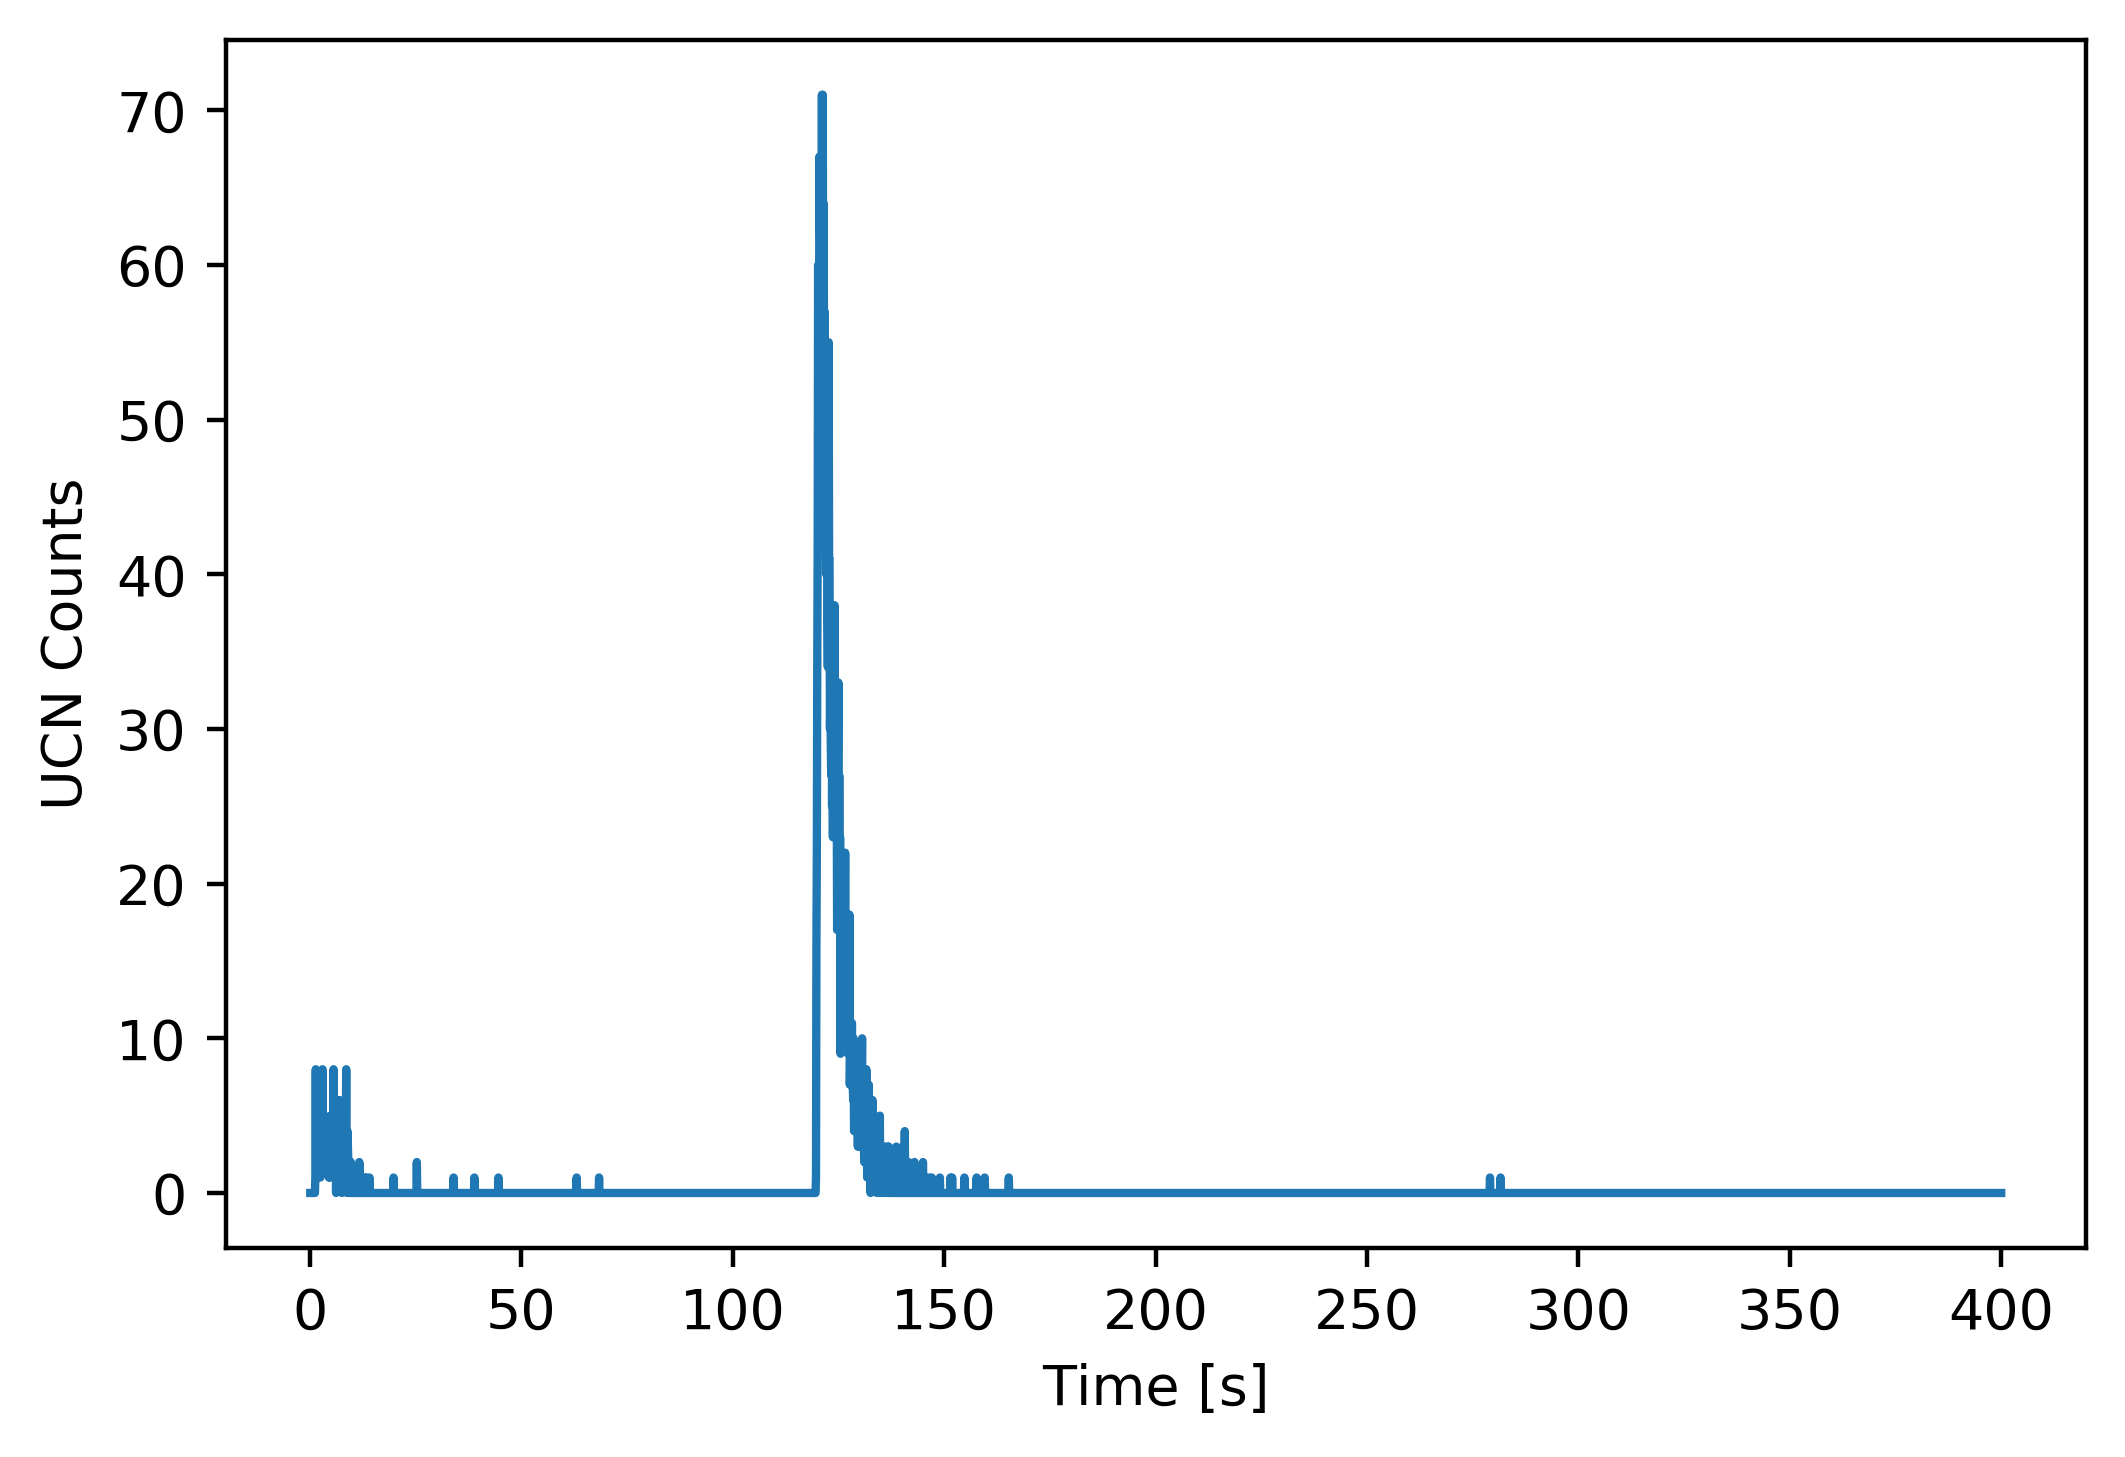

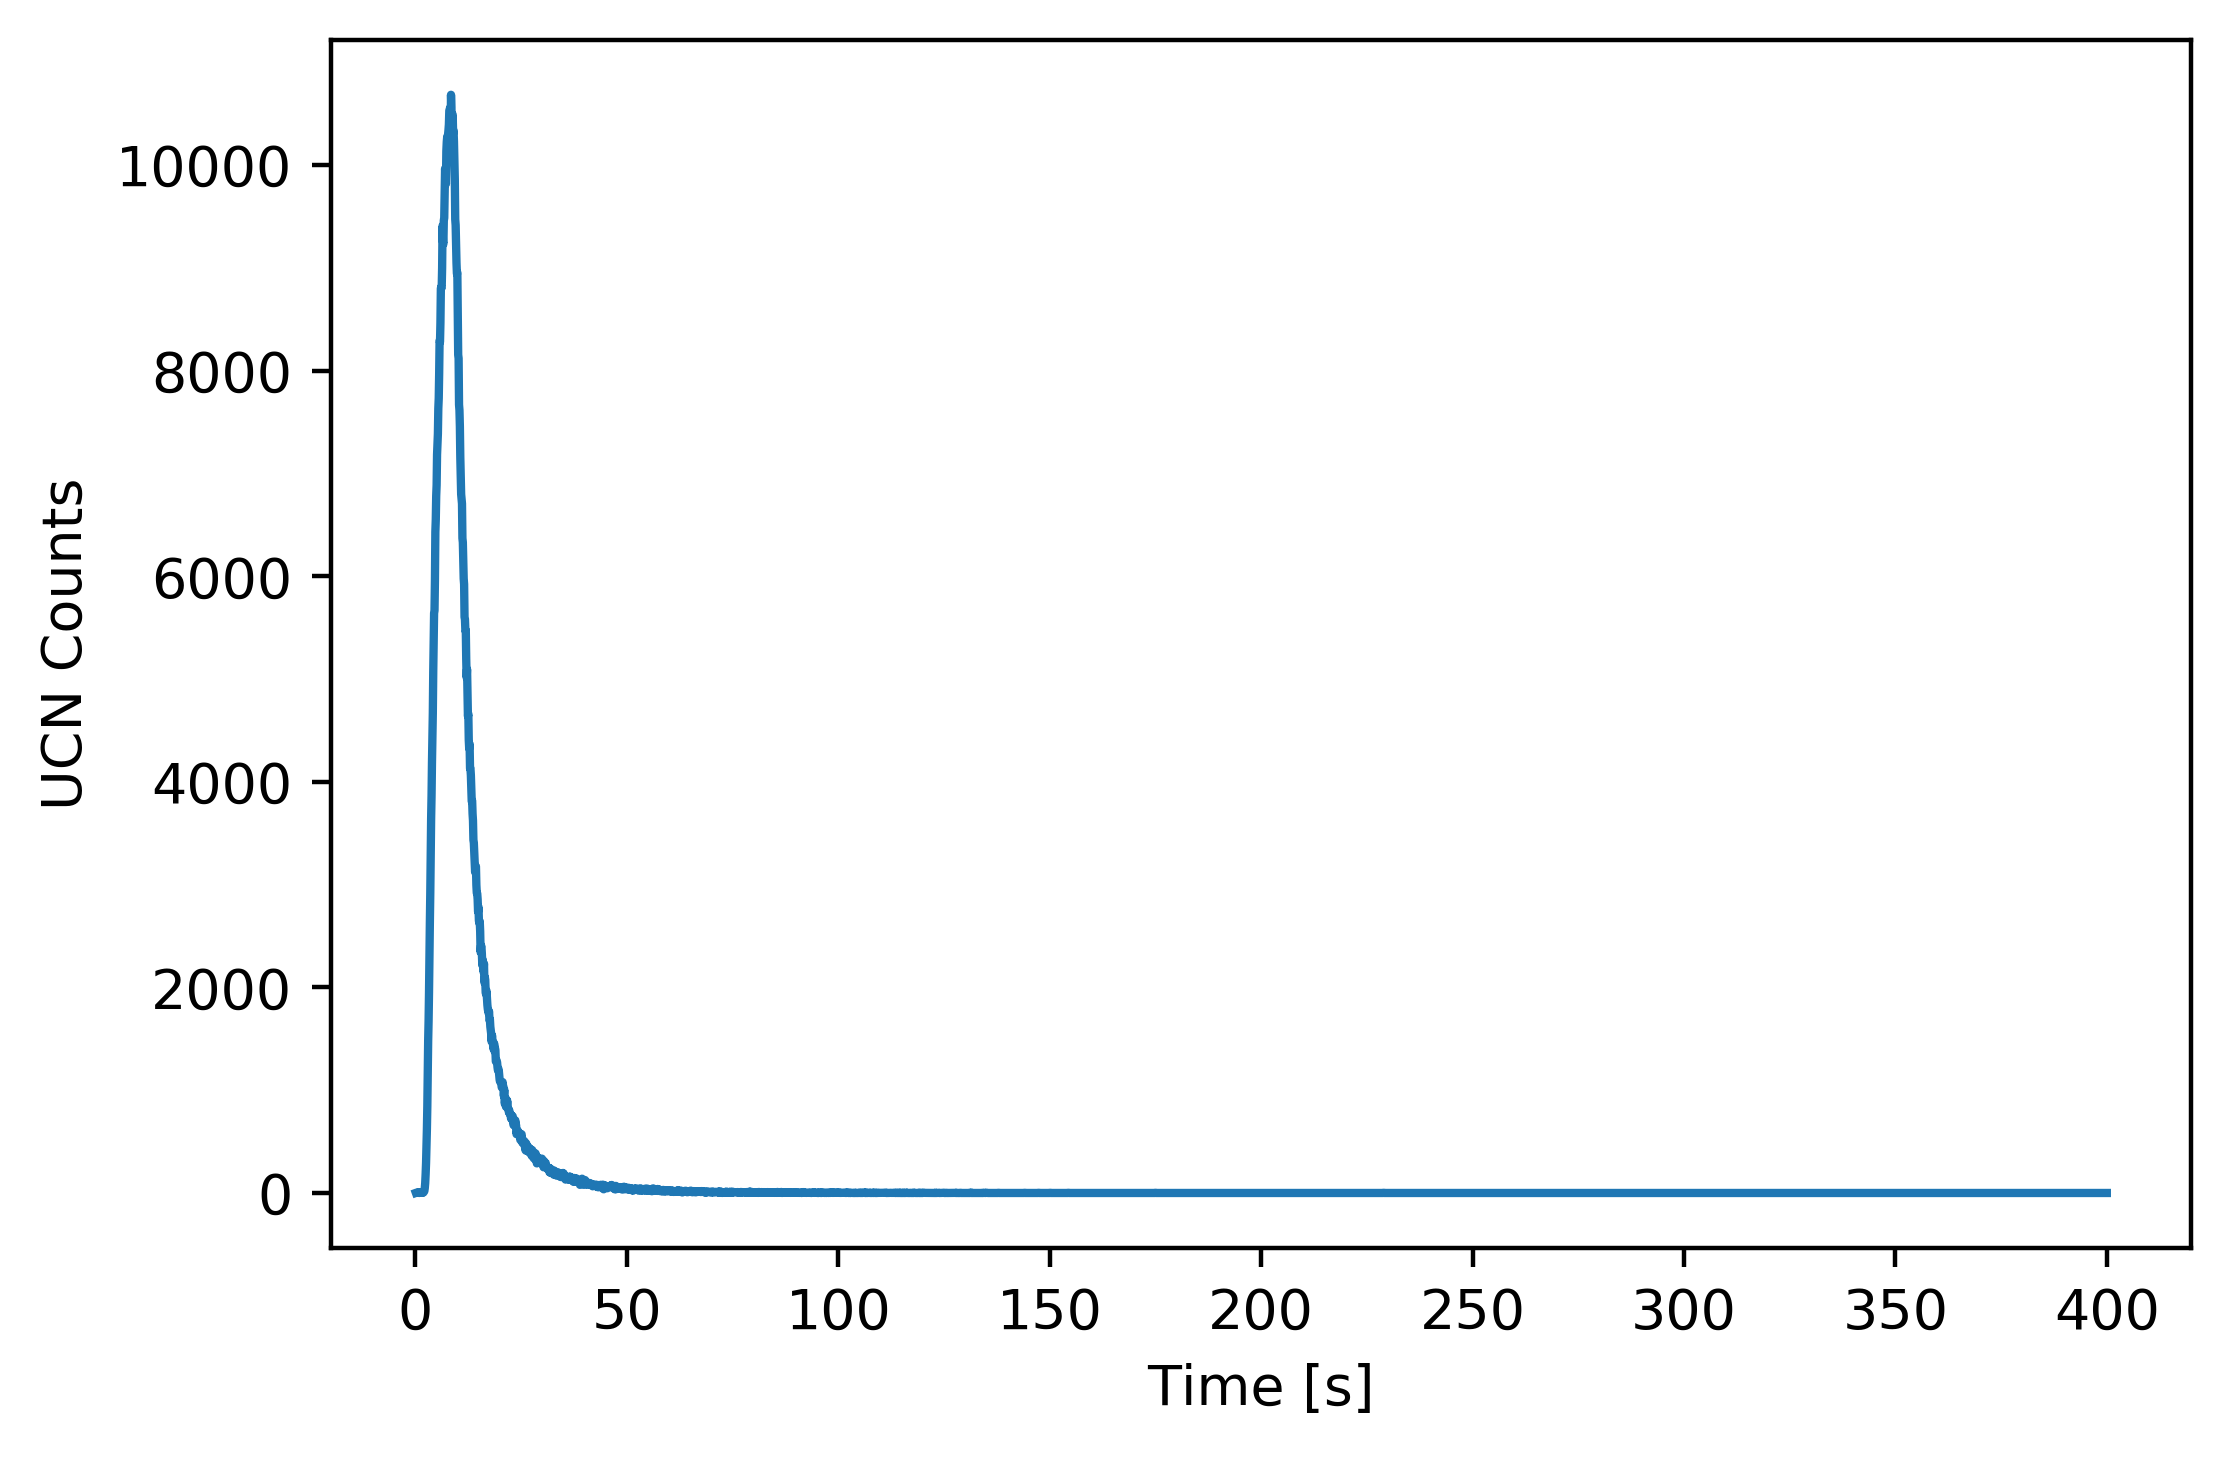

In [63]:
data = np.loadtxt("../data_main/12/8/T081217_0050.tof", usecols = (0,1));
plt.plot(data[:,0] * 0.1, data[:,1]);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');
plt.show()

plt.clf()
data = np.loadtxt("../data_monitor/12/T081217_0050.tof", usecols = (0,1));
plt.plot(data[:,0] * 0.1, data[:,1]);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');

Is it connected directly to the pre-storage volume? This would make sense given what we see in these plots.

### Issue 2

**If the normalization is now finally correct, do I understand correctly that everything prior to tof.22 should be disregarded?**

>NORMALIZATION correct <br/>
[Fri, Dec 08, 2017, 16:56:30 ] <br/>
open guide and beam shutter on South beamline <br/>
therefore the correct measurements start here: <br/>
[Fri, Dec 08, 2017, 16:57:05 ]  storage time 20s <br/>
tof.22  = 56458 <br/>

### Issue 3

**Clarifying on configurations**

I understand the general sequence of configurations, but there are a few lingering questions:

>[Fri, Dec 08, 2017, 14:29:49 ]<br/>
change setup to guide 1<br/>
However this was the wrong normalization<br/>
we have to mount 2 times 30cm Plexi tubes to be able to mount the test guides with extra flanges<br/>
therefore we mount the correct normalization setup<br/>
VAT - 30cm guide + 30 cm guide + Cascade counter<br/>

This comes before the statement, "NORMALIZATION correct", but it's unclear what the configuration is for these measurements, and for tof.22-35 which immediately follow. The last line of the above elog comment suggests that this is the setup pictured on slide 4 of 'note_PSI_Data_feb2019.pdf'. Am I right?

>[Fri, Dec 08, 2017, 21:10:33 ]  remove the first guide (Japanese SS with NiP coating).

What is the configuration when this guide is removed? Is it a return to slide 4?

>[Fri, Dec 08, 2017, 23:18:57 ]  mounting the second guide (Japanese Ti with NiP coating).

>[Sat, Dec 09, 2017, 12:51:18 ]  stop turbo, ramp down HV, prepare for normalization measurement.

>[Sat, Dec 09, 2017, 18:21:15 ]  prepare to break vacuum, in order to install SS disk.<br/>
[Sat, Dec 09, 2017, 19:07:26 ]  disk installed, ready to get measurement in direct. Open shutter 1, in order to get 1 measurement with no storage.

When is the second guide dismounted? Does "prepare for normalization measurement" mean that it was dismounted then? Was it dismounted to install the SS disk? What is the SS disk? What configuration are we in for the runs after the SS disk was installed? What are the experimental reasons for whichever configurations these are?

> [Sat, Dec 09, 2017, 20:23:47 ]  prepare to break vacuum in order to install the two flanges (normally connected to TRIUMF guides) in order to perform a normalization measurement. <br/>
>[Sat, Dec 09, 2017, 21:19:39 ]  two flanges installed (tapped and clamped...), ready to get measurement in direct. Open shutter 1, in order to get 1 measurement with no storage.

These two flanges are installed multiple times. Is this the same normalization measurement as was discussed just above? 

>[Sun, Dec 10, 2017, 22:30:50 ] prepare to break vacuum in order to perform more normalization measurements (we connect both plexi guides together, as at the beginning).

This comment is a big hint to me. My guess is that this configuration is the one in slide 4, and the one used in runs 22-35. Is it a different configuration than the "two flanges"? If so, there are two different "normalization" configurations? 

### Issue 4

**Which shutter was opened early? Where should I cut?**

>[Fri, Dec 08, 2017, 12:52:10 ]  100 s storage time <br/>
14.tof<br/>
we opened the shutter early so the spectrum has starting at ch ~ 1800 UCN from the source<br/>
needs to be cut for analysis<br/>

Looking at this run:

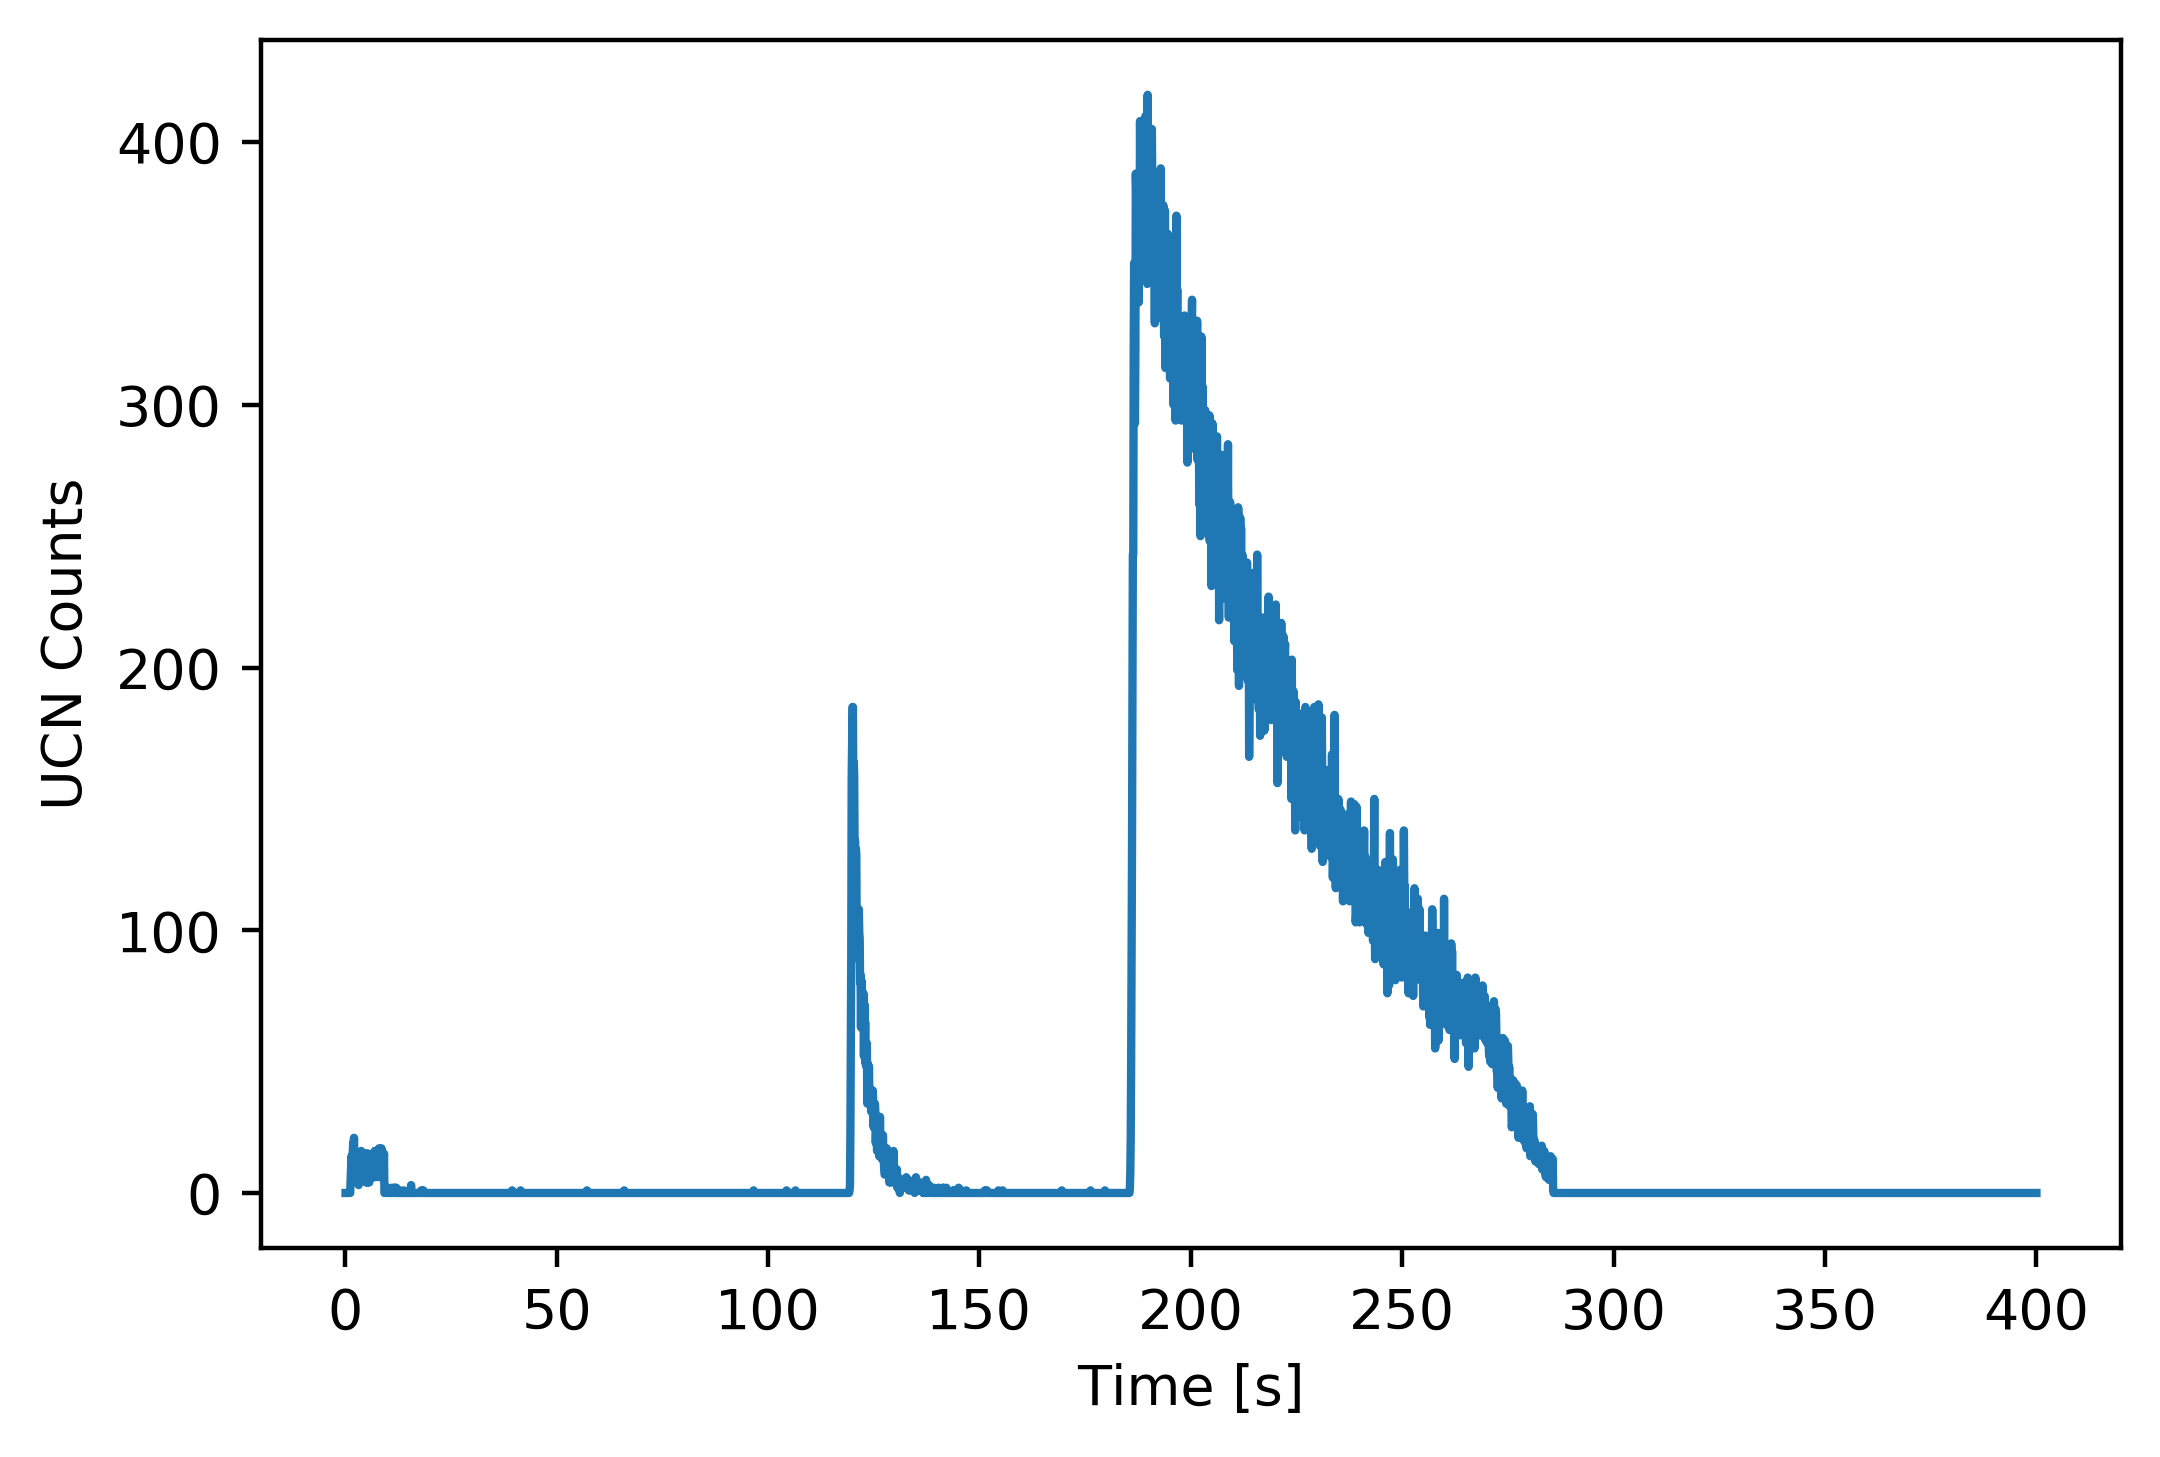

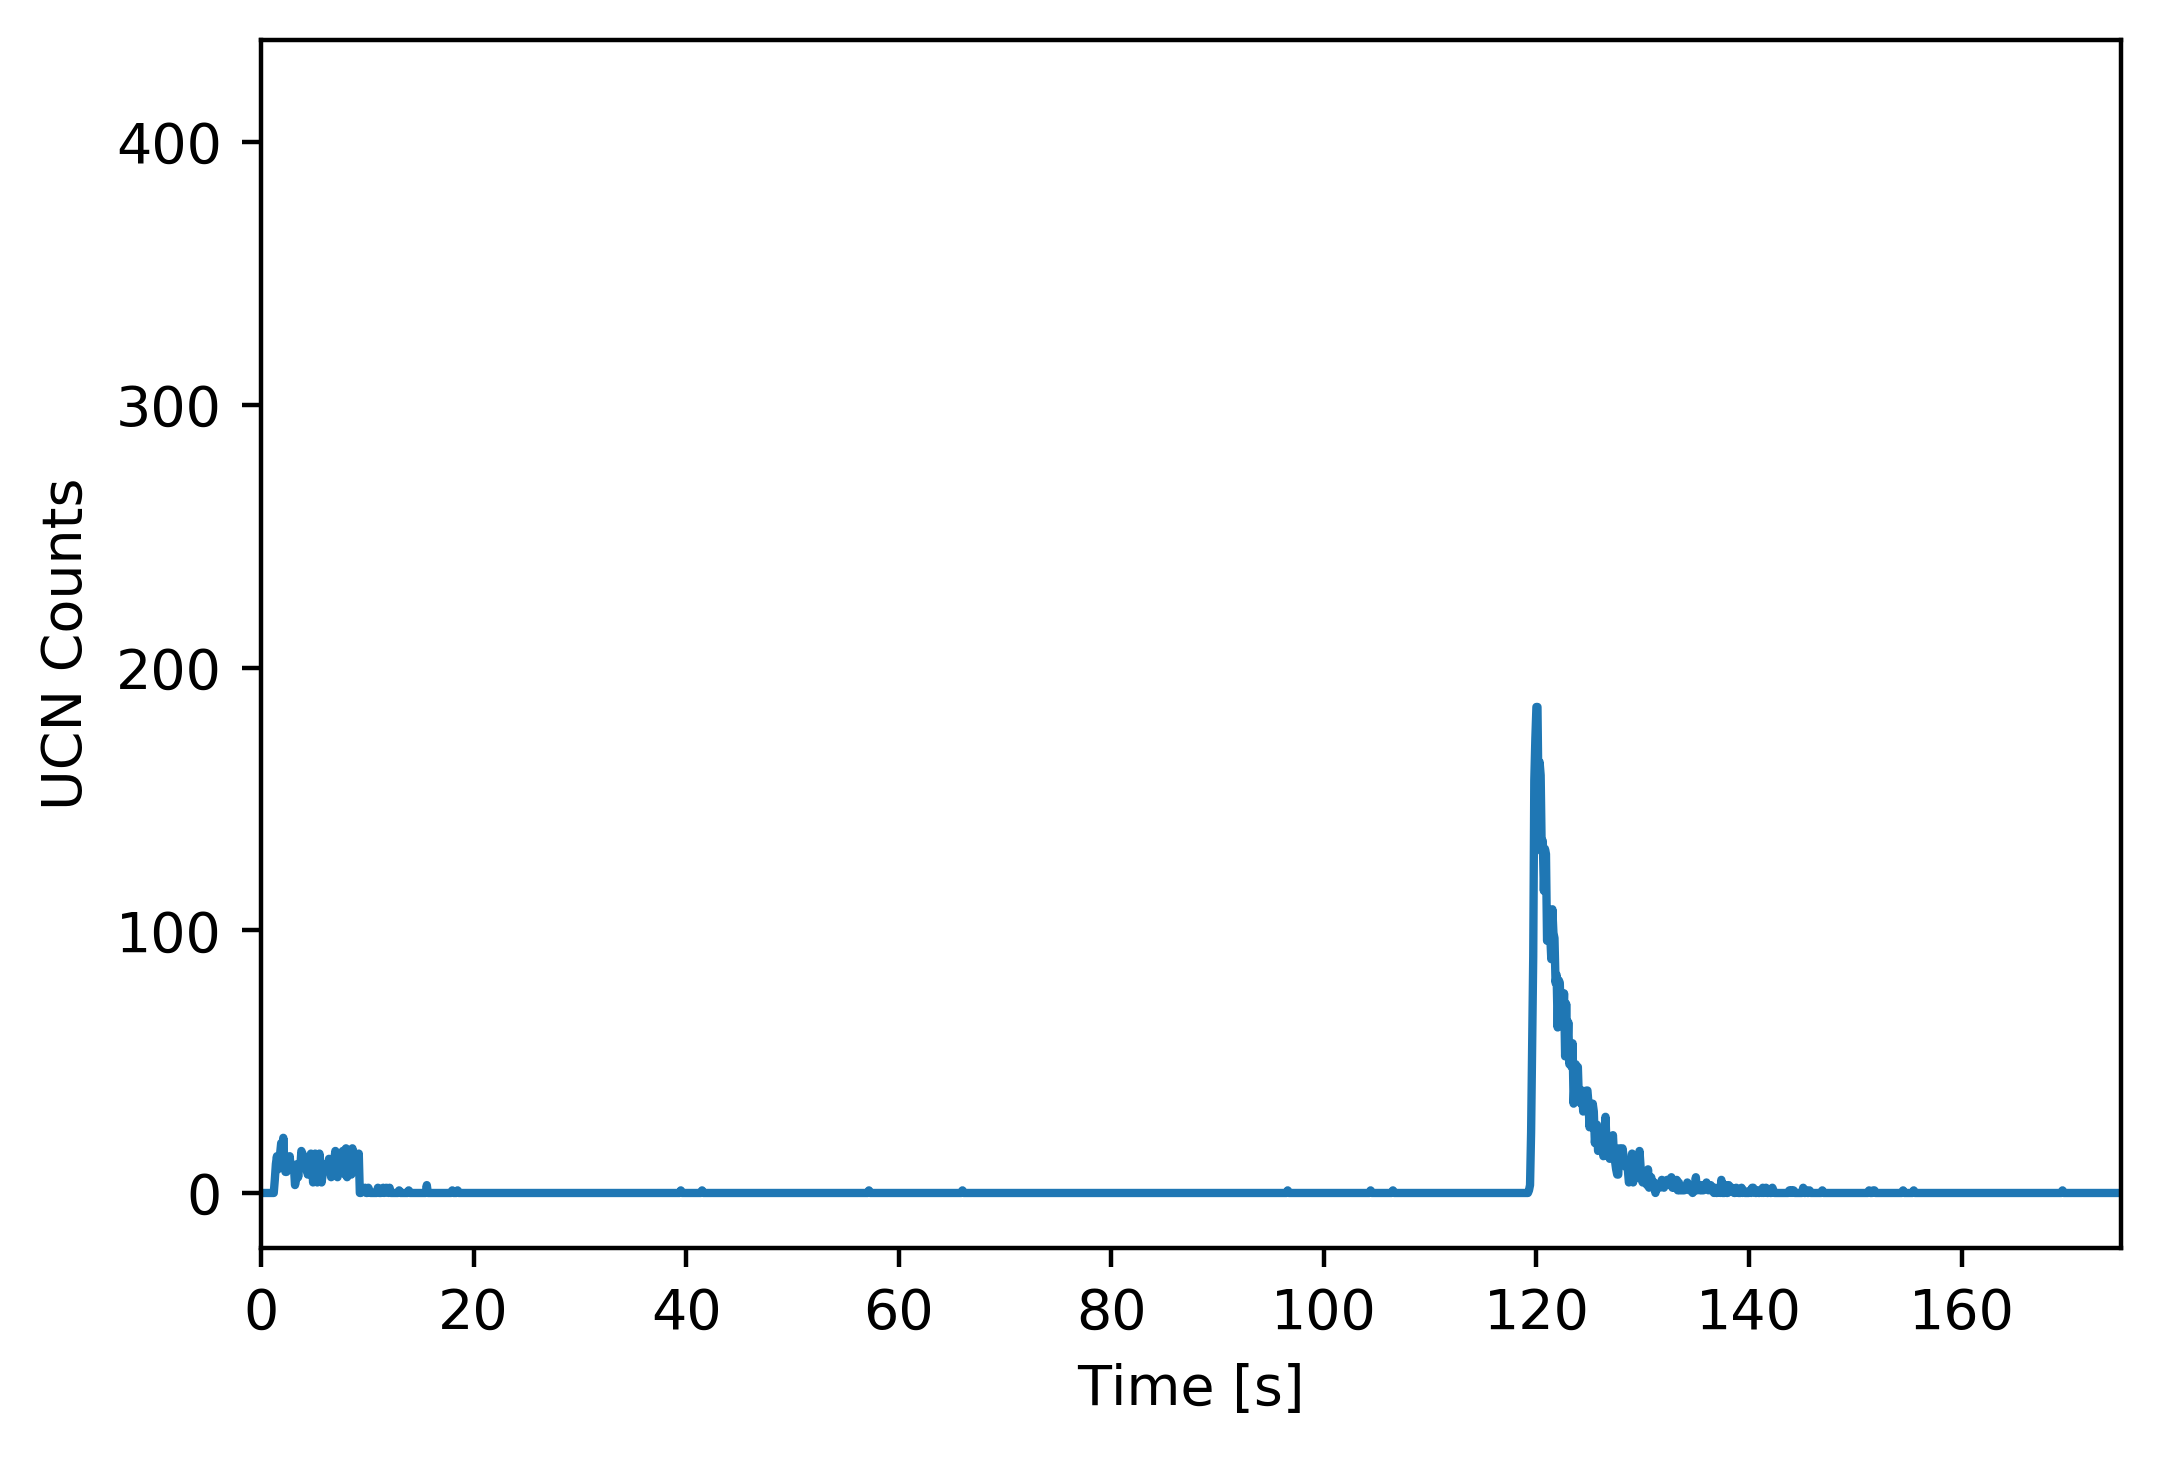

In [65]:
data = np.loadtxt("../data_main/12/8/T081217_0014.tof", usecols = (0,1));
plt.plot(data[:,0] * 0.1, data[:,1]);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');
plt.show()

plt.clf()
plt.plot(data[:,0] * 0.1, data[:,1]);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');
plt.xlim([0,175]);

It looks to me like the upstream shutter was opened early, and a flood of UCN came from the source at the end of the run. I would cut everything after ~175 s.

### Issue 6

**Are the direct shot runs to be used for the fitting the source performance over time? Do they have any other use in analysis?**

>[Fri, Dec 08, 2017, 21:29:09 ]  open shutter 1, in order to get 1 measurement with no storage.<br/>
>tof.76 = 4811900

Seems simple enough, I can just cut out everything after ~250 s?

### Issue 8

**Am I meant to be using these background numbers somehow? How were they being calculated online?**

>[Fri, Dec 08, 2017, 23:28:22 ]  storage 100 s <br/>
tof.99 = 2435 (background 314)

Comments like this "(background 314)" appear intermittently throughout the elog. 

314.0

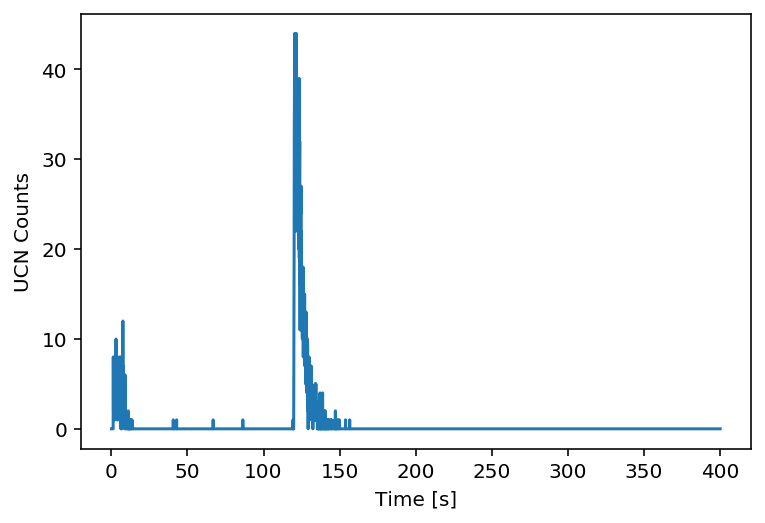

In [5]:
data = np.loadtxt("../data_main/12/8/T081217_0099.tof", usecols = (0,1));
plt.plot(data[:,0] * 0.1, data[:,1]);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');

Edgard's slides say that background has been subtracted from all the data. It certainly looks that way from the plots we've seen. Can I ignore these background comments in the elog?

## A list of every direct shot measurement, and the configuration to which it belongs.

This list will be used to analyze the degradation of the source performance over time.

Run #   | Day |  Configuration             |
---     | --- |  ---                       |
48      | 8   |  JP SUS guide with NiP     |
76      | 8   |  No Guide?                 |
98      | 8   |  JP Ti guide with NiP      |
120     | 9   |  Unclear?                  |
145     | 9   |  SS Disk                   |
175     | 9   |  Two flanges               |
120     | 9   |  Unclear?                  |
198     | 9   |  UGD01                     |
122     | 10  |  Two flanges               |
145     | 10  |  UGD03                     |
170     | 10  |  Two flanges               |
193     | 10  |  EP SUS guide with NiP     |
194     | 10  |  EP SUS guide with NiP     |
249     | 10  |  Two flanges               |
273     | 10  |  2 x 30 Plexiglass guides  |
274     | 10  |  2 x 30 Plexiglass guides  |


!!! Check channels for discrewpancy, does sum add up? sanity check?

## Rough Workspace

ignore all below

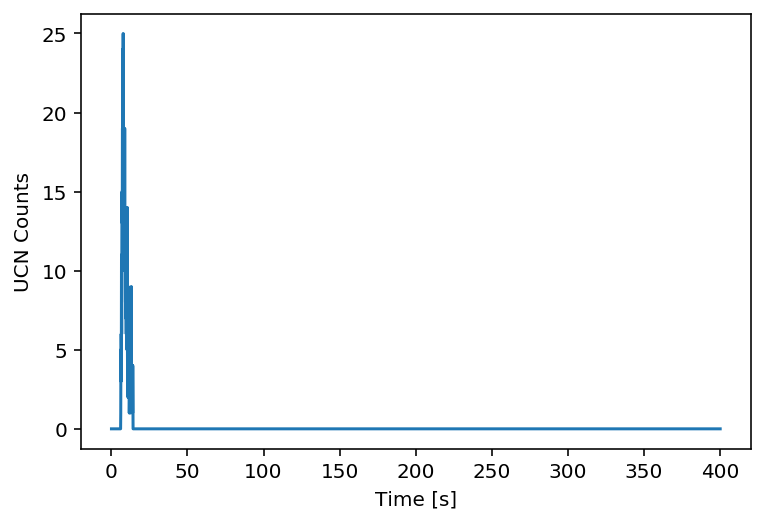

In [7]:
data = np.loadtxt("../data_monitor/12/T101217_0004.tof", usecols = (0,1));
plt.plot(data[:,0] * 0.1, data[:,1]);
plt.xlabel('Time [s]');
plt.ylabel('UCN Counts');